# Topic Modelling - Human Rights Abuses in Qatar Project Part 1

In this project, we perform Topic Modelling on Amnesty International reports about Human Rights Violations and Abuses in Qatar during the preparation of the FIFA 2022 World Cup that took place in November. The project is be based on 81 reports that were collected from the Amnesty International website and we will apply Latent Dirichlet Allocation LDA model with TFIDFVectorizer() and Countvectorizer() and compare the results. Since there's only 81 reports on Amnesty International website, each page of the report will be treated as a documents. Therefore about 1460 documents will be analysed for Topic Modelling.


**The project Objectives for Part 1 of this project :**

**1. Extract Topics from Amnesty Reports**

We preprocess words in the topics gathered from the reports to remove stop words and visualise using wordCould. These topics will be used as a base to compare with LDA model results.

**2. Text extraction from PDF Amnesty Reports**

We use python libraries (PyPDF2) to convert PDF documents into texts. We create a dataframe of these reports that consists of dates, topics and report texts. Text reports are extracted by page and each page will be treated as a document. 

**3. Data Preprocessing**

We perform cleaning of our dataset using regular expressions and NLTK libraries for tokenisation, stopwords removal, stemming, so that our dataset is ready for analyses of texts using Topic Modelling techniques. We will further create bigrams and trigrams using gensim library.


### Libraries

In [2]:
import os
import PyPDF2, io
from io import BytesIO
from pathlib import Path
import pypdfium2 as pdfium
from PyPDF2 import PdfFileWriter, PdfFileReader

In [3]:
import re
import string
import math
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting

In [4]:
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # for stemming
from nltk.tokenize import word_tokenize # for tokenization
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [5]:
import gensim
from gensim import models # for: TfidfModel()
from gensim import corpora # for: Dictionary(), word2bow()
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
import plotly.express as px # for nice plotting
from nltk.tokenize import RegexpTokenizer # for LSA in sklearn, we will need additional tokenizer
from sklearn.feature_extraction.text import CountVectorizer # one can consider LSA with DF in DTM...
from sklearn.feature_extraction.text import TfidfVectorizer # or with TF-IDF values in DTM
from sklearn.decomposition import LatentDirichletAllocation # LDA implementation

In [7]:
import pickle 
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

# 1. Extract Topics on Amnesty Reports

In [8]:
# extracts pdf document names to loop through as topics
mydir= 'Amnesty Reports'
date_topics = []
x = 1
for i, file in enumerate(os.listdir(mydir)):
    if x < 2000:
        date_topics.append(file)
    x += 1

    # extract topics only
topics = []
for topic in date_topics:
    topics.append(' '.join(topic.split()[3:]))

# extract dates only
dates = []
for date in date_topics:
    dates.append(' '.join(date.split()[0:3]))

# create a dataframe of dates and topics from .txt
df1 = pd.DataFrame(zip(dates,topics), columns=['Dates','Topics'])

In [9]:
# loop through the topics to extract topic names 
topic_words = []
for i in df1['Topics']:
    x = i.split('.')[0]
    topic_words.append(x.lower())

topic_words = ' '.join(topic_words)

In [10]:
# creating a function for removing punctuations and stop words
def text_process(data):
    """
    0. remove special characters
    1. Tokenizise
    1. remove punctuations from data
    2. remove stop words
    3. return list of clean text words
    """
    topic = re.sub('[^a-zA-Z0-9 \n\.]', '', data)
    word_tokens = word_tokenize(topic) 
    stop_words = nltk.corpus.stopwords.words('english')
    stop_words = pd.Series(stop_words)
    stop_words = list(stop_words)
    
    
    nopunct = [char for char in word_tokens  if char not in string.punctuation]
    nopunct = ' '.join(nopunct)
    clean_data = [word for word in nopunct.split() if word.lower() not in stop_words]
    return clean_data

topic_clean = text_process(topic_words) 
topic_clean = ' '.join(topic_clean)

Text(0.5, 1.0, 'Topics - Amnesty International')

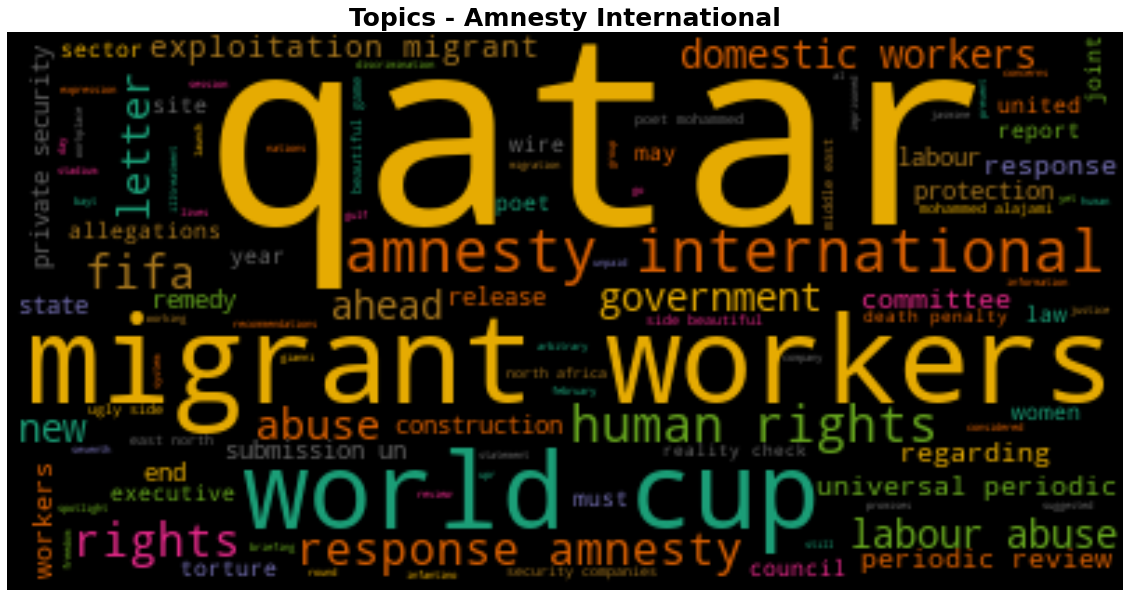

In [11]:
# show a wordcloud for Leo Messi interview
from wordcloud import WordCloud
wc = WordCloud(background_color='black', colormap='Dark2', max_font_size=95, random_state=42)

plt.rcParams['figure.figsize'] = [20,12]
wc.generate(topic_clean)
plt.plot()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Topics - Amnesty International', fontsize=25, fontweight='bold')

# 2. Text extraction from PDF Amnesty Reports

In [12]:
# extract texts from pdf files and save on directory
for arch, topic in zip(os.listdir(mydir), date_topics): # loop through the pdf files and topics extracted from pdf
    buffer = io.BytesIO()
    archpath = os.path.join(mydir, arch) # get the path for each 
    
    with open(archpath,'rb') as f:
        pdfFileObj = open(archpath, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj) # converting pdf to text using the PyPDF2 method
        pdfReader.numPages # get number of pages for each document
         
        # loop through each page to convert pdf to .txt
        for page_number in range(pdfReader.numPages):
            pageObj = pdfReader.getPage(page_number) 
            rawInfo = pageObj.extractText().split("\n") # text for each page extracted
            with open(topic+str(page_number)+'.txt',"w", encoding='utf8') as f: # save each page as a document
                f.write(pageObj.extractText('utf8','ignore'))        

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref t

In [13]:
# create a dataframe that contains all documents by looping through the .txt files from directory
mydir2 = "Results 1"

Document_texts = []
for file_name in os.listdir(mydir2):
    archpath = os.path.join(mydir2, file_name)
    if '.txt' in file_name:
    # Load the text file
        f = open(archpath, "r", encoding="utf8", errors='ignore')
        # Read the text in the file
        text = f.read()
        
        #Topics2.append(file_name)
        Document_texts.append(text)
# save as dataframe
df = pd.DataFrame(Document_texts)

In [14]:
#document count
df.count()

0    1463
dtype: int64

# 3. Data Preprocessing

1. Extracting text from directory
2. Initial Data Cleaning
3. Tokenisation
4. Stemming
5. Stop Word Removal
6. Create Bigrams and Trigrams using Gensim

## a) Initial data cleaning

 We use regular expressions to clean our dataset

In [15]:
# remove \n
qatar_texts = df[0].map(lambda x: re.sub('\n', ' ', x))

# remove words with numbers
qatar_texts = qatar_texts.map(lambda x: re.sub(r'\w*\d\w*', ' ', x).strip())

#removing websites \S matches any character that is not whitespace
qatar_texts = qatar_texts.map(lambda x: re.sub(r'www\S+', ' ', x))

# removing http/s
giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
#tweets = tweet_name.str.replace(giant_url_regex, '')

qatar_texts = qatar_texts.str.replace(giant_url_regex, '')

#removing .
qatar_texts = qatar_texts.map(lambda x: re.sub(r"([.]+)", ' ', x))

#removing one-letter words
qatar_texts = qatar_texts.map(lambda x: re.sub(r'\b\w\b', ' ', x))

#removing ,\!?/:;''()``’“-”—#
qatar_texts = qatar_texts.map(lambda x: re.sub("[,\!?/:;''()``’“-”—#]", '', x))

#removing \ 
qatar_texts = qatar_texts.map(lambda x: re.sub(r'\\', '', x))

#removing all numbers 
qatar_texts = qatar_texts.map(lambda x: re.sub(r'[0-9]+', '', x))

#all letters to lower case
qatar_texts = qatar_texts.map(lambda x: x.lower())

# remove special characters from string
qatar_texts = qatar_texts.map(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

#removing space
qatar_texts = qatar_texts.map(lambda x: re.sub(r"([\s+])", ' ', x))

qatar_texts = qatar_texts.str.replace(giant_url_regex, '')

In [16]:
# add clean text to dataframe
df['Document Text'] = qatar_texts

# The length column to be used in Part 3 of the project
df['length'] = df['Document Text'].apply(len)

In [17]:
# review the dataframe
df.head()

,0,Document Text,length
0,Qatar: Submission to the UN Universal Periodic...,qatar submission to the un universal periodic ...,1578
1,Qatar: Submission to the UN Universal Periodic...,qatar submission to the un universal periodic ...,3150
2,Qatar: Submission to the UN Universal Periodi...,qatar submission to the un universal periodic ...,3146
3,Qatar: Submission to the UN Universal Periodic...,qatar submission to the un universal periodic ...,3638
4,Qatar: Submission to the UN Universal Periodi...,qatar submission to the un universal periodic ...,3750


In [18]:
# remove documents less than 100 word count
df = df[df['length'] > 100]
df = df.reset_index(drop=True)

# print final document count
qatar_texts = df['Document Text']
df.count()

0                1462
Document Text    1462
length           1462
dtype: int64

In [19]:
df.describe()

,length
count,1462.000000
mean,2781.679891
std,1210.295137
min,117.000000
25%,1974.500000
50%,2743.500000
75%,3441.750000
max,9692.000000


## b) Tokenization

Tokenisation is a standard process that need to be done before any textual analysis and shall be applied to every single text. Tokenisation basically split the paragraphs and sentences into smaller units (tokens) that can be more easily assigned meaning.

In [20]:
# word_tokenize() applied to every single text
for i in range(0,len(qatar_texts)):
    qatar_texts[i] = word_tokenize(qatar_texts[i])
    
qatar_texts.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_7652\3341670123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qatar_texts[i] = word_tokenize(qatar_texts[i])


0    [qatar, submission, to, the, un, universal, pe...
1    [qatar, submission, to, the, un, universal, pe...
2    [qatar, submission, to, the, un, universal, pe...
3    [qatar, submission, to, the, un, universal, pe...
4    [qatar, submission, to, the, un, universal, pe...
Name: Document Text, dtype: object

In [21]:
# add tokens to dataframe
df['Document Tokens'] = qatar_texts
df.head()

,0,Document Text,length,Document Tokens
0,Qatar: Submission to the UN Universal Periodic...,"[qatar, submission, to, the, un, universal, pe...",1578,"[qatar, submission, to, the, un, universal, pe..."
1,Qatar: Submission to the UN Universal Periodic...,"[qatar, submission, to, the, un, universal, pe...",3150,"[qatar, submission, to, the, un, universal, pe..."
2,Qatar: Submission to the UN Universal Periodi...,"[qatar, submission, to, the, un, universal, pe...",3146,"[qatar, submission, to, the, un, universal, pe..."
3,Qatar: Submission to the UN Universal Periodic...,"[qatar, submission, to, the, un, universal, pe...",3638,"[qatar, submission, to, the, un, universal, pe..."
4,Qatar: Submission to the UN Universal Periodi...,"[qatar, submission, to, the, un, universal, pe...",3750,"[qatar, submission, to, the, un, universal, pe..."


## c) Stemming

Stemming is reducing term to its root-part (no suffixes, prefixes). Lemmatization is converting words to their basic, dictionary form. Both implementtions may give different results when applied.

In [22]:
# stems every token in document and append it to a list
ps = PorterStemmer()
stem_list = []

for i in range(0,len(qatar_texts)):
    
    words = []
    for word in qatar_texts[i]:
        words.append(ps.stem(word)) 
    
    stem_list.append(words)                                   

print(f'Document Text bBefore Stemming is Applied')
qatar_texts.head()

Document Text bBefore Stemming is Applied


0    [qatar, submission, to, the, un, universal, pe...
1    [qatar, submission, to, the, un, universal, pe...
2    [qatar, submission, to, the, un, universal, pe...
3    [qatar, submission, to, the, un, universal, pe...
4    [qatar, submission, to, the, un, universal, pe...
Name: Document Text, dtype: object

In [23]:
# create a pd.series of stemmed text
qatar_text_ps = pd.Series(stem_list)

# add to dataframe
df['stemmed_tokens'] = qatar_text_ps
print(f'Document Text After Stemming is Applied')
qatar_text_ps.head()


Document Text After Stemming is Applied


0    [qatar, submiss, to, the, un, univers, period,...
1    [qatar, submiss, to, the, un, univers, period,...
2    [qatar, submiss, to, the, un, univers, period,...
3    [qatar, submiss, to, the, un, univers, period,...
4    [qatar, submiss, to, the, un, univers, period,...
dtype: object

## d) Stop Word Removal

Stop words are words that are completely non-informative and should be removed from the analysed corpus.

A new stopwords list is created with clean stop words and other specific tokens not captured during preprocessing step.

In [24]:
# download the Stopwords
stop_words = nltk.corpus.stopwords.words('english')

In [25]:
# create another stop word list that has clean stopwords
stop_words2 = pd.Series(stop_words).map(lambda x: re.sub('\n', '', x))
stop_words2 = stop_words2.map(lambda x: re.sub("[,\!?/:;''()``]", '', x))
stop_words2 = stop_words2.map(lambda x: re.sub(r"([.]+)", '', x))

# stemming the second stopwords list
ps = PorterStemmer()
for i in range(0,len(stop_words2)):
    stop_words2[i] = ps.stem(stop_words2[i])

# making stopwords back a list
stop_words2 = list(stop_words2)

In [26]:
# add specific stop words
# these stop words appeared in the Text so i decided to add them here to make sure they are removed
stop_words4 = list(['mde', 'xef', 'http', 'https', 'index', 'index mde', 'also', 'ai', 'ior','annex', 'pages', 'page' ])
stop_words3 = list(['cant', 'youre', 'ive', 'im', 'us', 'thats', 'weve', 'hes', 'whats','theyll','theyre','itll','shes', 'jul', 'sep', 'en'])
months = list(["january", 'february', 'march', 'april', 'may', 'june','july','august','september', 'october', 'november', 'december'])

In [27]:
# adding stopwords to a single list
stop_words_extend = stop_words + stop_words2 + stop_words3 + stop_words4 + months

#adding some other specific stopwords
stop_words_extend.append('``')
stop_words_extend.append("\'\'")
stop_words_extend.append('[')
stop_words_extend.append(']')

In [28]:
# removing stopwords from qatar Text texts
for i in range(0,len(qatar_texts)):
    qatar_texts[i] = [word for word in qatar_texts[i] if not word in list(stop_words_extend)]
qatar_texts.head(5)

C:\Users\hp\AppData\Local\Temp\ipykernel_7652\1415353307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qatar_texts[i] = [word for word in qatar_texts[i] if not word in list(stop_words_extend)]


0    [qatar, submission, un, universal, periodic, r...
1    [qatar, submission, un, universal, periodic, r...
2    [qatar, submission, un, universal, periodic, e...
3    [qatar, submission, un, universal, periodic, r...
4    [qatar, submission, un, universal, periodic, e...
Name: Document Text, dtype: object

In [29]:
# add tokens after stemming and stop words removal to  df
df['qatar_tokens'] = qatar_texts

# join the tokenised text to recreate a setence out of tokens
preprocessed_text = []
for i in range(0, len(qatar_texts)):
    preprocessed_text.append(' '.join(qatar_texts[i]))
    
df['qatar_texts'] = preprocessed_text

In [30]:
# dataframe with all the reports information
df.head(3)

,0,Document Text,length,Document Tokens,stemmed_tokens,qatar_tokens,qatar_texts
0,Qatar: Submission to the UN Universal Periodic...,"[qatar, submission, un, universal, periodic, r...",1578,"[qatar, submission, to, the, un, universal, pe...","[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...
1,Qatar: Submission to the UN Universal Periodic...,"[qatar, submission, un, universal, periodic, r...",3150,"[qatar, submission, to, the, un, universal, pe...","[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...
2,Qatar: Submission to the UN Universal Periodi...,"[qatar, submission, un, universal, periodic, e...",3146,"[qatar, submission, to, the, un, universal, pe...","[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, e...",qatar submission un universal periodic eview s...


In [31]:
# Create a clean dataset we are going to use for the rest of this part of the project
df_qatar = df[['stemmed_tokens','qatar_tokens', 'qatar_texts']]

In [32]:
df_qatar.head()

,stemmed_tokens,qatar_tokens,qatar_texts
0,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...
1,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...
2,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, e...",qatar submission un universal periodic eview s...
3,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...
4,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, e...",qatar submission un universal periodic eview s...


## e) Bigrams and Trigrams using GENSIM

We make use of the gensim library to create our bigrams (pairs of consequential tokens) and trigrams (threes of  consequential tokens), in our documents

In [33]:
# using GENSIM TO MAKE BI AND TRIGRAMS
bigrams_phrases = gensim.models.Phrases(df_qatar.qatar_tokens, min_count = 5, threshold=50)
trigrams_phrases = gensim.models.Phrases(bigrams_phrases[df_qatar.qatar_tokens], threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigrams_phrases)

def make_bigrams(texts):
    return(bigram[doc] for doc in texts)

def make_trigrams(texts):
    return(trigram[bigram[doc]] for doc in texts)

data_bigrams = make_bigrams(df_qatar.qatar_tokens)
data_bigrams_trigrams = make_trigrams(df_qatar.qatar_tokens)

In [34]:
# create an instance of a generator
x = list(data_bigrams)

# converting generator to a pandas
qatar_gensim = pd.Series(x)

# saving tokens to a dataframe
df_qatar['qatar_tokens_gensim'] = qatar_gensim 

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [35]:
# join the tokenised text to recreate a setence out of tokens
gensim_text = []
for i in range(0, len(qatar_gensim)):
    gensim_text.append(' '.join(qatar_gensim[i]))
    
df_qatar['qatar_text_gensim'] = gensim_text

In [36]:
# view dataframe for added columns
df_qatar.head()

,stemmed_tokens,qatar_tokens,qatar_texts,qatar_tokens_gensim,qatar_text_gensim
0,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...,"[qatar, submission_un, universal_periodic, rev...",qatar submission_un universal_periodic review ...
1,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...,"[qatar, submission_un, universal_periodic, rev...",qatar submission_un universal_periodic review ...
2,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, e...",qatar submission un universal periodic eview s...,"[qatar, submission_un, universal_periodic, evi...",qatar submission_un universal_periodic eview s...
3,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...,"[qatar, submission_un, universal_periodic, rev...",qatar submission_un universal_periodic review ...
4,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, e...",qatar submission un universal periodic eview s...,"[qatar, submission_un, universal_periodic, evi...",qatar submission_un universal_periodic eview s...


In [37]:
# source: https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/
def generate_ngrams(text, ngram = 1):
    temp = zip(*[text[i:] for i in range(0,ngram)]) # set with pairs, three, ..., ns of tokens
    ans = [' '.join(ngram) for ngram in temp] # joins the elements in strings
    ans = pd.Series(ans).map(lambda x: re.sub(" ", '_', x)) # replaces spaces with '_'
    return list(ans)


qatar_texts = df_qatar['qatar_tokens']

for i in range(0,len(qatar_texts)):
    unigrams = qatar_texts[i]
    bigrams = generate_ngrams(qatar_texts[i], ngram = 2)
    trigrams = generate_ngrams(qatar_texts[i], ngram = 3)
    
    text = []
    text.append(unigrams)
    text.append(bigrams)
    text.append(trigrams)
    
    qatar_texts[i] = [item for sublist in text for item in sublist] 
    # so called 'list comprehension'
    # More: https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists

#qatar_texts

C:\Users\hp\AppData\Local\Temp\ipykernel_7652\1355664077.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qatar_texts[i] = [item for sublist in text for item in sublist]


In [38]:
# saving n_grams tokens to a dataframe
#df_qatar['qatar_tokens_ngrams'] = qatar_texts  

# join the tokenised text to recreate a setence out of tokens
#ngram_text = []
#for i in range(0, len(qatar_texts)):
#    ngram_text.append(' '.join(qatar_texts[i]))
    
#df_qatar['qatar_text_ngram'] = ngram_text

In [39]:
df_qatar.head()

,stemmed_tokens,qatar_tokens,qatar_texts,qatar_tokens_gensim,qatar_text_gensim
0,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...,"[qatar, submission_un, universal_periodic, rev...",qatar submission_un universal_periodic review ...
1,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...,"[qatar, submission_un, universal_periodic, rev...",qatar submission_un universal_periodic review ...
2,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, e...",qatar submission un universal periodic eview s...,"[qatar, submission_un, universal_periodic, evi...",qatar submission_un universal_periodic eview s...
3,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, r...",qatar submission un universal periodic review ...,"[qatar, submission_un, universal_periodic, rev...",qatar submission_un universal_periodic review ...
4,"[qatar, submiss, to, the, un, univers, period,...","[qatar, submission, un, universal, periodic, e...",qatar submission un universal periodic eview s...,"[qatar, submission_un, universal_periodic, evi...",qatar submission_un universal_periodic eview s...


### Review documents for bigrams using Gensim

In [75]:
# view short document After gensim is applied
df_qatar['qatar_text_gensim'][0]

'qatar submission_un universal_periodic review session_upr working_group amnesty international amnesty internationa documents furt fifa executiv committee must address qatar migrant workers rights qatar standards migrant workers starting point qatar unpaid migrant construction workers left go hungry qatar treat_like human migrant workers qatar qatar dark_side igration spotlight qatar construction_sector ahead_world cup ind ex qatar end corporate exploitation migrant construction workers qatar exploited struggling_survive qatar qatar information conviction qatari poet upheld qatar release poet sentenced years prison qatar information activists released forbidden travel qatar information detained qatari activists hunger strike qatar information activists removed solitary_confinement qatar two activists held_incommunicado danger documents available amnesty international website qatar'

In [41]:
# Here, we save preprocessed texts
save_object(df_qatar, r'outputs/df_qatar.pkl')
save_object(df_qatar, r'outputs/df_qatar.txt')

# save topic words
save_object(topic_clean, r'outputs/topic_clean.pkl')
save_object(topic_clean, r'outputs/topic_clean.txt')

### Term frequency (TF)

Calculating TF for all the tokens included in the first text.

In [45]:
#dictionary from gensim library = keys are: 1, 2, 3, ..., number of tokens; values are tokens' names
dictionary = corpora.Dictionary( qatar_gensim) 

#corpus from gensim library consists of so called bows
#every bow = keys are tokens' indexes; values are numbers of tokens' occurences in text
corpus = [dictionary.doc2bow(text) for text in  qatar_gensim]

In [ ]:
#corpus[0]

In [46]:
# function to filter corpus using tf
def TF(dictionary, corpus, which_text):
    
    #corpus from gensim library consists of so called bows
    #every bow = keys are tokens' indexes; values are numbers of tokens' occurences in text
    bow = dict(corpus[which_text])
    
    
    #dict_combined = keys are tokens' names; values are numbers of tokens' occurences in text
    bow_dict_combined = dict((dictionary[key], value) for (key, value) in bow.items())
    
    TFdictionary = {}
    bow_count = sum(bow_dict_combined.values()) #number of tokens in text
    
    for word, count in bow_dict_combined.items():
        TFdictionary[word] = count/bow_count
    
    return TFdictionary

In [50]:
TF(dictionary, corpus, 1188) #Term Frequency in document no. 0

{'construction': 0.07692307692307693,
 'workers': 0.15384615384615385,
 'domestic': 0.07692307692307693,
 'particularly': 0.07692307692307693,
 'sexual_violence': 0.07692307692307693,
 'access': 0.15384615384615385,
 'courts': 0.07692307692307693,
 'due': 0.07692307692307693,
 'lack': 0.07692307692307693,
 'justic': 0.07692307692307693,
 'nability': 0.07692307692307693}

Let's visualise TF for all tokens and all documents.

In [52]:
d = {} # this dictionary will include all tokens names as keys and all TF values found for those tokens in a form of list

for i in range(0,len(corpus)): # for each text
    data = TF(dictionary, corpus, i) # calculates TF for all tokens in text

    for token, tf in data.items(): # for each token and calculated TF
        d.setdefault(token, []).append(tf) # fills dictionary named 'd'

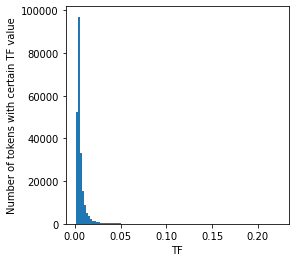

In [60]:
# dictionary 'd' looks like above, let us take TF values only - we will have list of lists
# the below makes list of lists a list
tf_values = [item for sublist in list(d.values()) for item in sublist]

plt.rcParams['figure.figsize'] = [4,4]
#now, simple histogram
plt.hist(tf_values, bins=100)
plt.xlabel('TF')
plt.ylabel('Number of tokens with certain TF value')
plt.show()

# TF-IDF

Ngrams implies more tokens. The higher the order of the ngrams, the more tokens to be processed by the algorithm. Also, usually there are tokens that are observed extremely rarely. They cause an unnecessary noise in the corpus. In topic modelling, the above can be handled with filtering the tokens with respect to their occurence.

As TF-IDF is most popular, its calculation is already optimaly implemented in the gensim library.
NB : Determining thresholds for removing tokens should be based on "usefulness of terms in the retrieval process" (Aizawa, 2003)

In [62]:
# remove frequently occuring words
# dictionary created using corpora, # input variable => is tokens, # output => number of tokens; values are tokens' names
dictionary = corpora.Dictionary(df_qatar.qatar_tokens_gensim)

# corpus from gensim library consists of so called bows
# every bow = keys are tokens' indexes; values are numbers of tokens' occurences in text
corpus = [dictionary.doc2bow(texts) for texts in df_qatar.qatar_tokens_gensim]

# make tfidf a model 
tfidf_model = models.TfidfModel(corpus, id2word = dictionary)


### Calculating TFIDF values for one text only.

In [63]:
# Calculating TFIDF values for one text only.
# create a function to print token names and tfidf values

def TFIDF(dictionary, corpus, which_text, tfidf_model):
    bow = corpus[which_text]
    tfidfdictionary = dict(tfidf_model[bow]) #TFIDF for tokens in a chosen text
    
    #below: keys are tokens' names; values are numbers of tokens' occurences in text
    TFIDFdictionary = dict((dictionary[key], value) for (key, value) in tfidfdictionary.items())
    
    return(TFIDFdictionary)

In [64]:
TFIDF(dictionary, corpus, 1188, tfidf_model)

{'construction': 0.1455172840668146,
 'workers': 0.05587065218853801,
 'domestic': 0.1116015412041294,
 'particularly': 0.19662332305958966,
 'sexual_violence': 0.30849996410856656,
 'access': 0.2826533200486708,
 'courts': 0.20926702127591046,
 'due': 0.1678010769299591,
 'lack': 0.16650937018477202,
 'justic': 0.5408848912775058,
 'nability': 0.5977379896894913}

### Calculate TF-IDF for all tokens in all texts.

The higher the TF-IDF score the more important or relevant the term is; as a term gets less relevant, its TF-IDF score will approach 0

In [65]:
# calculate TF-IDF for all tokens in all texts.
d_tfidf = {}

for i in range(0,len(corpus)): # for each text
    data = TFIDF(dictionary, corpus, i, tfidf_model) # calculate TFIDF values for text's tokens

    for token, value in data.items(): # next, for each token and its TFIDF value in text, prepare a dictionary
                                      # with tokens' names as keys and list of TF-IDFs as values
        d_tfidf.setdefault(token, []).append(value)

In [68]:
#d_tfidf

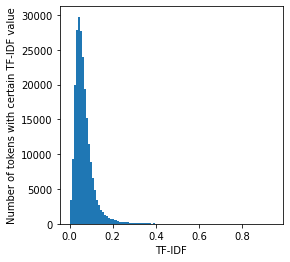

In [67]:
# Plot the results
tfidf_values = [item for sublist in list(d_tfidf.values()) for item in sublist]
plt.hist(tfidf_values, bins=100)
plt.xlabel('TF-IDF')
plt.ylabel('Number of tokens with certain TF-IDF value')
plt.show()

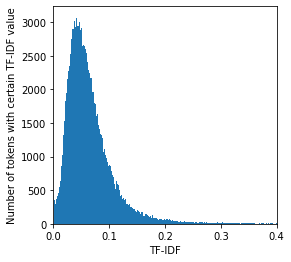

In [69]:
# Plot the results
tfidf_values = [item for sublist in list(d_tfidf.values()) for item in sublist]
plt.hist(tfidf_values, bins=1000)
plt.xlabel('TF-IDF')
plt.ylabel('Number of tokens with certain TF-IDF value')
plt.xlim([0,0.4])
plt.show()

In [70]:
# Calculating quantiles
for i in [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5]:
    print('Quantile ',i*100,'%: ',np.quantile(tfidf_values,i),sep='')

Quantile 1.0%: 0.007495066057933422
Quantile 2.0%: 0.011840327494231775
Quantile 3.0%: 0.014730431504248987
Quantile 4.0%: 0.016896488392599426
Quantile 5.0%: 0.018538625207050196
Quantile 10.0%: 0.024673925011752654
Quantile 20.0%: 0.033376467402041594
Quantile 30.0%: 0.04062410835350748
Quantile 40.0%: 0.04778404615039327
Quantile 50.0%: 0.055412219512891714


# Filtering with respect to TF-IDF

Filtering with respect to TF-IDF values

In [71]:
def TFIDF_FILTER(texts, lower_bound = 0.0001, higher_bound = 99999):
    
    dictionary = corpora.Dictionary(texts) 
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    tfidf_model = models.TfidfModel(corpus, id2word = dictionary)
    
    new_texts = texts.copy()
    for i in range(0,len(corpus)): #each text sequentially
        scores = TFIDF(dictionary, corpus, 0, tfidf_model) #TFIDF for tokens in the text
    
        tokens_to_stay = []
        
        for token, tfidf in scores.items():
            if((tfidf > lower_bound) and (tfidf < higher_bound)):
                tokens_to_stay.append(token)
    
        for j in range(0,len(texts)):
            new_texts[j] = [t for t in texts[j] if t in tokens_to_stay]
    
    return(new_texts)

In [72]:
# Filtering tokens with a lower bound of 0.02
print('Document no. 1 had',len(df_qatar.qatar_tokens_gensim[0]),'tokens. After filtering with TF-IDF, there are',len(TFIDF_FILTER(df_qatar.qatar_tokens_gensim[0:25], lower_bound = 0.02)[0]),'tokens.')

Document no. 1 had 103 tokens. After filtering with TF-IDF, there are 98 tokens.


In [73]:
# Document no. 1 before filtering with TF-IDF (sample of first 10 texts), first 10 tokens displayed
df_qatar.qatar_tokens_gensim[0][0:10]

['qatar',
 'submission_un',
 'universal_periodic',
 'review',
 'session_upr',
 'working_group',
 'amnesty',
 'international',
 'amnesty',
 'internationa']

In [74]:
# Document no. 1 after filtering with TF-IDF, first 10 tokens displayed
TFIDF_FILTER(df_qatar.qatar_tokens_gensim[0:10], lower_bound = 0.02)[0][0:10]

['internationa',
 'documents',
 'furt',
 'fifa',
 'executiv',
 'committee',
 'must',
 'address',
 'migrant',
 'workers']

Next Part of the project involves applying Topic Modelling algorithm to our clean texts. We are going to use both CountVectorizer and TFIDFVectorizer in models applied and compare the results. Also, we will apply topic coherence as a quality measure to find optimal number of topics. 